In [24]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

In [3]:
spam=pd.read_csv('emails.csv',encoding='latin-1')

In [4]:
spam

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


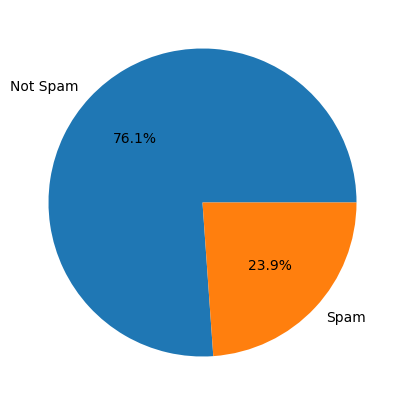

In [ ]:
plt.figure(figsize=(10,5))
plt.pie(spam['spam'].value_counts(),labels=['Not Spam','Spam'],autopct='%1.1f%%')
plt.axis('off')
plt.show()

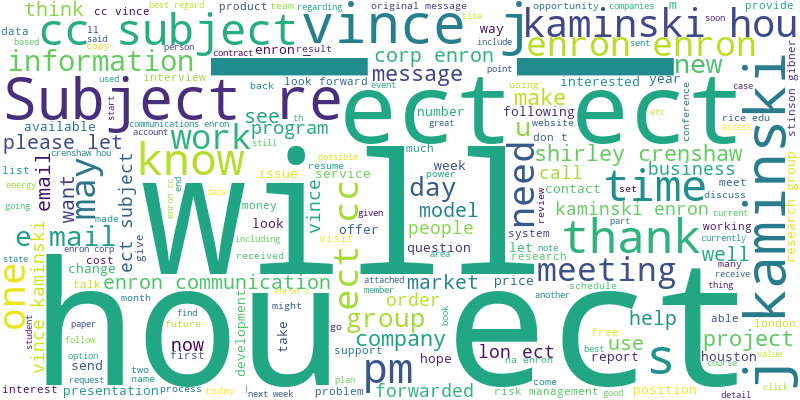

In [26]:
wordcloud=WordCloud(width=800,height=400,background_color='white').generate(' '.join(spam['text']))
wordcloud.to_image()

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB   
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [6]:
encoder=LabelEncoder()

In [28]:
vectorization=CountVectorizer()
x=vectorization.fit_transform(spam['text'].values)

In [29]:
train=Pipeline([('vectorization',CountVectorizer()),('model',MultinomialNB())])

In [30]:
X_train,X_test,Y_train,Y_test=train_test_split(spam['text'],spam['spam'],test_size=0.2)

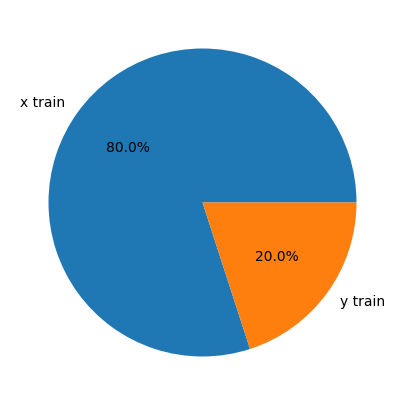

In [40]:
plt.figure(figsize=(10,5))
plt.pie([len(X_train),len(X_test)],labels=['x train','y train'],autopct='%1.1f%%')
plt.show()

In [41]:
train.fit(X_train,Y_train)

Pipeline(steps=[('vectorization', CountVectorizer()),
                ('model', MultinomialNB())])

In [44]:
train.predict(['Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C apply 08452810075over18’s'])

array([1])

In [43]:
train.score(X_test,Y_test)

0.9956369982547993

In [49]:
filename = input("Enter the file name: ")
with open(filename, 'r') as file:
    content = file.read()
    print(train.predict([content]))

[0]
